Shape: (1143, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8      

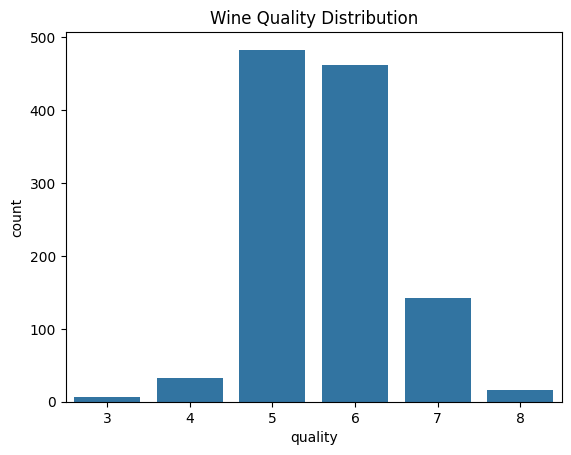

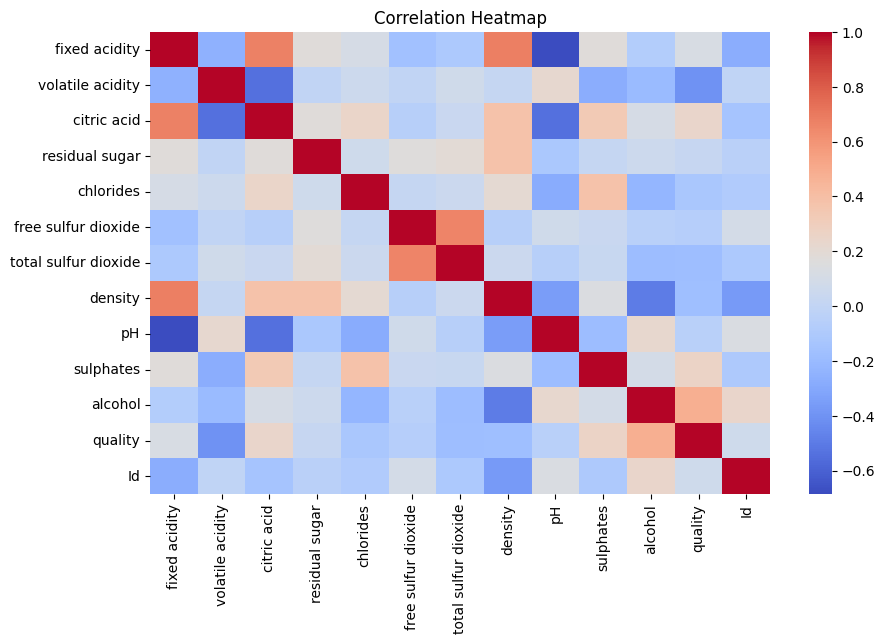

Random Forest Accuracy: 0.9170305676855895
Logistic Regression Accuracy: 0.8951965065502183
Selected model: Random Forest
Model saved as model.pkl


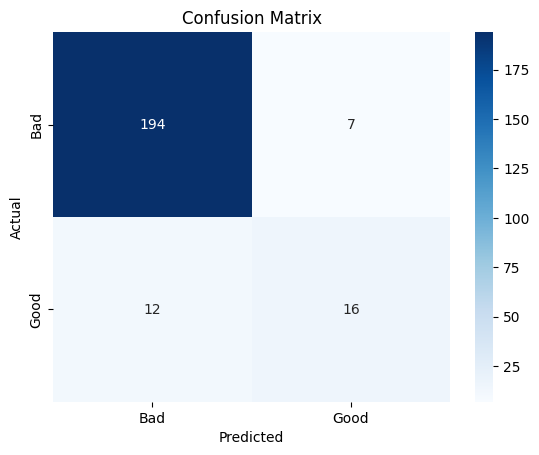


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       201
           1       0.70      0.57      0.63        28

    accuracy                           0.92       229
   macro avg       0.82      0.77      0.79       229
weighted avg       0.91      0.92      0.91       229



In [3]:
# --- 1. Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# --- 2. Load dataset ---
df = pd.read_csv("../data/winequality.csv")

# --- 3. EDA ---
print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

# Plot quality distribution
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --- 4. Target Transformation ---
# Convert quality to binary: 1 = Good (>=7), 0 = Bad (<7)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# --- 5. Feature selection ---
# These 11 features will match your Streamlit sliders exactly
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]
X = df[features]
y = df['quality']

# --- 6. Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 7. Model training ---
# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)

print("Random Forest Accuracy:", rf_acc)
print("Logistic Regression Accuracy:", lr_acc)

# --- 8. Model comparison ---
if rf_acc >= lr_acc:
    best_model = rf_model
    print("Selected model: Random Forest")
else:
    best_model = lr_model
    print("Selected model: Logistic Regression")

# --- 9. Save best model ---
joblib.dump(best_model, "../model.pkl")
print("Model saved as model.pkl")

# --- 10. Evaluation ---
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, best_model.predict(X_test)))
